In [215]:
import nltk
import pandas as pd
import numpy as np
import altair as alt

In [216]:
annotation_df = pd.read_csv("../Milestone_3/Monica_Chandler_Annotated.csv")
annotation_df

,episode,scene,texts,C1,C2
0,Episode 101: The Pilot-The Uncut Version,"Central Perk, Chandler, Joey, Phoebe, and Mon...","[['Monica', ""Okay, everybody relax. This is no...",0,0
1,Episode 101: The Pilot-The Uncut Version,"Central Perk, Chandler, Joey, Phoebe, and Mon...","[['Chandler', ""All of a sudden, the phone star...",0,0
2,Episode 101: The Pilot-The Uncut Version,"Central Perk, Chandler, Joey, Phoebe, and Mon...","[['Chandler', 'Cookie?'], ['Monica', '(explain...",0,0
3,Episode 101: The Pilot-The Uncut Version,"Central Perk, Chandler, Joey, Phoebe, and Mon...","[['Chandler', 'And I just want a million dolla...",0,0
4,Episode 101: The Pilot-The Uncut Version,"Central Perk, Chandler, Joey, Phoebe, and Mon...","[['Monica', ""Now I'm guessing that he bought h...",0,0
...,...,...,...,...,...
1143,Episode 1018: The Last One (2),Joey's apartment. Joey and Chandler are still...,"[['Chandler', 'We have to bust it open, but ne...",1,0
1144,Episode 1018: The Last One (2),Joey's apartment. Monica has completely destr...,"[['Monica', 'Alright. My job here is done.'], ...",1,0
1145,Episode 1018: The Last One (2),"Monica and Chandler's apartment. Joey, Chandl...","[['Monica', ""Well, that's it. Everything's pac...",0,0
1146,Episode 1018: The Last One (2),Monica and Chandler's apartment. Chandler and...,"[['Monica', ""Oh, honey, I forgot. I promised T...",1,0


In [233]:
def adjust_sentiment(df):
    difference = df['C1'] - df['C2']
    if df['C1'] == df['C2']:
        val = df['C1']
    elif difference == -1 or difference == 1:
        val = 0
    else:
        if len(df['texts']) < 1100:
            val = 0
        else:
            val = 1
    return int(val)

In [234]:
gold_annotation_df['gold_standard'] = annotation_df.apply(adjust_sentiment, axis=1)
gold_annotation_df = gold_annotation_df[["episode", "scene", "texts", "gold_standard"]]
gold_annotation_df

,episode,scene,texts,gold_standard
0,Episode 101: The Pilot-The Uncut Version,"Central Perk, Chandler, Joey, Phoebe, and Mon...","[['Monica', ""Okay, everybody relax. This is no...",0
1,Episode 101: The Pilot-The Uncut Version,"Central Perk, Chandler, Joey, Phoebe, and Mon...","[['Chandler', ""All of a sudden, the phone star...",0
2,Episode 101: The Pilot-The Uncut Version,"Central Perk, Chandler, Joey, Phoebe, and Mon...","[['Chandler', 'Cookie?'], ['Monica', '(explain...",0
3,Episode 101: The Pilot-The Uncut Version,"Central Perk, Chandler, Joey, Phoebe, and Mon...","[['Chandler', 'And I just want a million dolla...",0
4,Episode 101: The Pilot-The Uncut Version,"Central Perk, Chandler, Joey, Phoebe, and Mon...","[['Monica', ""Now I'm guessing that he bought h...",0
...,...,...,...,...
1143,Episode 1018: The Last One (2),Joey's apartment. Joey and Chandler are still...,"[['Chandler', 'We have to bust it open, but ne...",0
1144,Episode 1018: The Last One (2),Joey's apartment. Monica has completely destr...,"[['Monica', 'Alright. My job here is done.'], ...",0
1145,Episode 1018: The Last One (2),"Monica and Chandler's apartment. Joey, Chandl...","[['Monica', ""Well, that's it. Everything's pac...",0
1146,Episode 1018: The Last One (2),Monica and Chandler's apartment. Chandler and...,"[['Monica', ""Oh, honey, I forgot. I promised T...",0


In [225]:
gold_annotation_df['gold_standard'].sum()

114

In [226]:
gold_annotation_df.to_csv("Monica_Chandler_Gold_Annotation.csv", index=False)

## Generating graphs

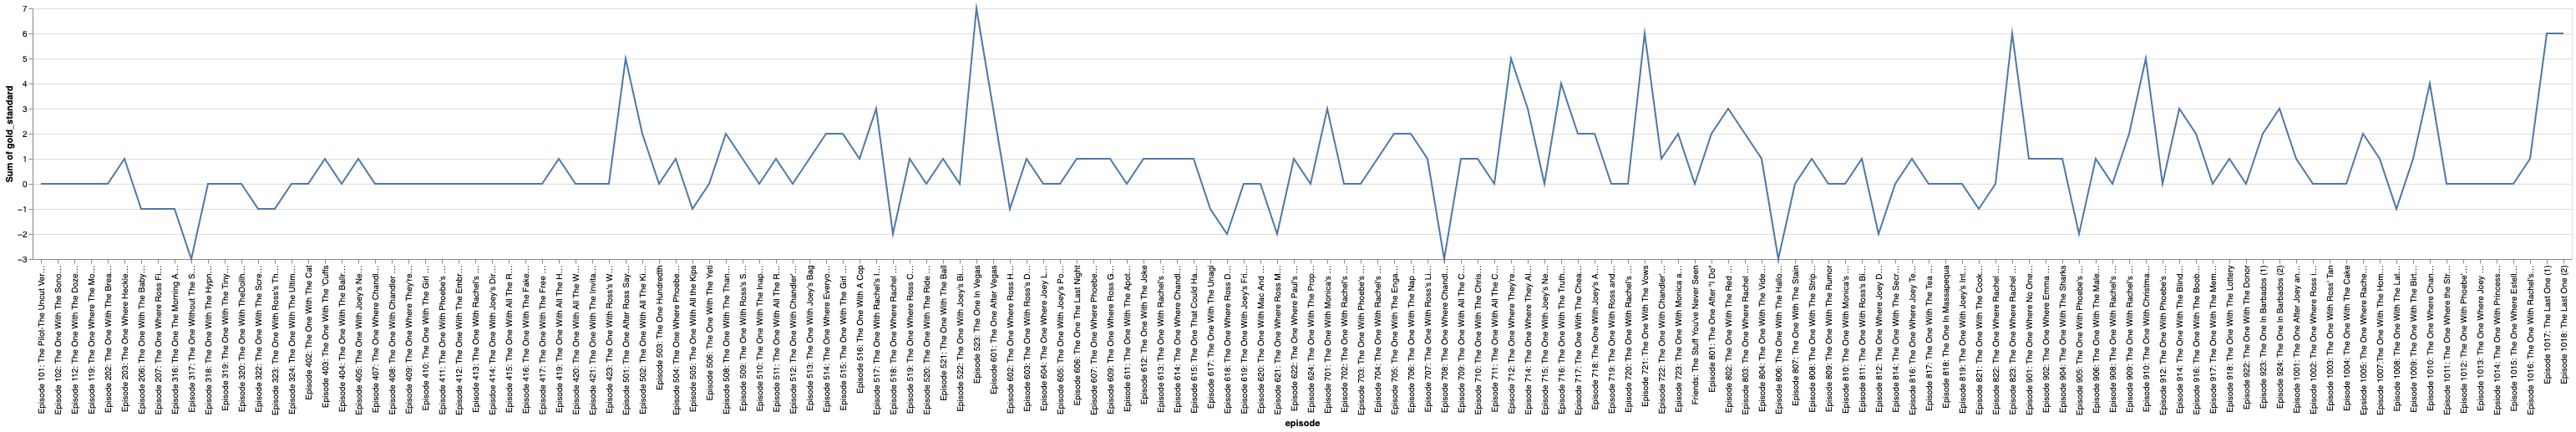

In [265]:
overall_relationship_change = alt.Chart(gold_annotation_df).mark_line().encode(
    x=alt.X('episode', sort=None),
    y=alt.Y('sum(gold_standard)'))
overall_relationship_change

In [277]:
# overall_relationship_change.save('overall_relationship_change.json')

### All Seasons

In [228]:
season1_episode_order = gold_annotation_df['episode'][:17].tolist()
season2_episode_order = gold_annotation_df['episode'][17:35].tolist()
season3_episode_order = gold_annotation_df['episode'][35:70].tolist()
season4_episode_order = gold_annotation_df['episode'][70:163].tolist()
season5_episode_order = gold_annotation_df['episode'][163:349].tolist()
season6_episode_order = gold_annotation_df['episode'][349:510].tolist()
season7_episode_order = gold_annotation_df['episode'][510:689].tolist()
season8_episode_order = gold_annotation_df['episode'][690:800].tolist()
season9_episode_order = gold_annotation_df['episode'][800:953].tolist()
season10_episode_order = gold_annotation_df['episode'][953:].tolist()

In [263]:
# episode_order
def season_sentiment(df, num):
    '''Input dataframe should only be gold_annotation_df, the number indicates the specific season.
       This function will return the graph of the relationship change in the specified season.'''
    if num > 0 and num < 11:
        if num == 1:
            season_episodes = df['episode'][:17].tolist()
            season = df[:17]
        elif num == 2:
            season_episodes = df['episode'][17:35].tolist()
            season = df[17:35]
        elif num == 3:
            season_episodes = df['episode'][35:70].tolist()
            season = df[35:70]
        elif num == 4:
            season_episodes = df['episode'][70:163].tolist()
            season = df[70:163]
        elif num == 5:
            season_episodes = df['episode'][163:349].tolist()
            season = df[163:349]
        elif num == 6:
            season_episodes = df['episode'][349:510].tolist()
            season = df[349:510]
        elif num == 7:
            season_episodes = df['episode'][510:689].tolist()
            season = df[510:689]
        elif num == 8:
            season_episodes = df['episode'][690:800].tolist()
            season = df[690:800]
        elif num == 9:
            season_episodes = df['episode'][800:953].tolist()
            season = df[800:953]
        else:
            season_episodes = df['episode'][953:].tolist()
            season = df[953:]
    
        graph = alt.Chart(season).mark_line().encode(
            x=alt.X('episode', sort=season_episodes),
            y=alt.Y('sum(gold_standard)'))
    
    else:
        print("Season number out of range.")
    
    return graph

In [264]:
season1_graph = season_sentiment(gold_annotation_df, 1)
season2_graph = season_sentiment(gold_annotation_df, 2)
season3_graph = season_sentiment(gold_annotation_df, 3)
season4_graph = season_sentiment(gold_annotation_df, 4)
season5_graph = season_sentiment(gold_annotation_df, 5)
season6_graph = season_sentiment(gold_annotation_df, 6)
season7_graph = season_sentiment(gold_annotation_df, 7)
season8_graph = season_sentiment(gold_annotation_df, 8)
season9_graph = season_sentiment(gold_annotation_df, 9)
season10_graph = season_sentiment(gold_annotation_df, 10)

### Season 1

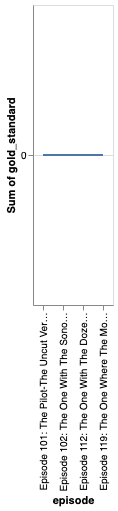

In [250]:
season1_graph

In [278]:
# season1_graph.save('season1_graph.json')

### Season 2

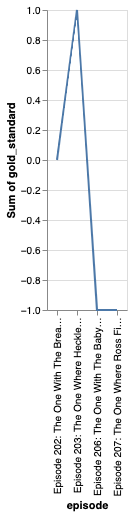

In [251]:
season2_graph

In [279]:
# season2_graph.save('season2_graph.json')

### Season 3

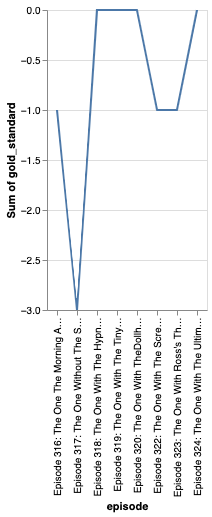

In [252]:
season3_graph

In [280]:
# season3_graph.save('season3_graph.json')

### Season 4

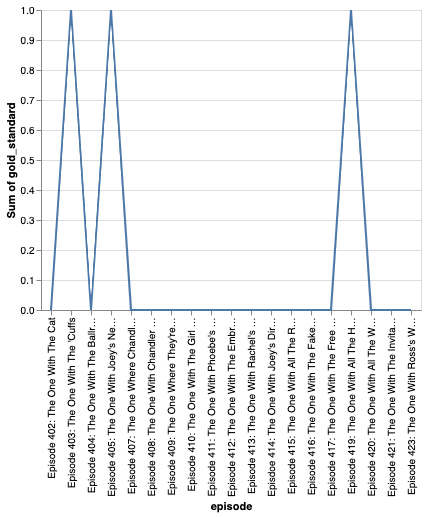

In [253]:
season4_graph

In [281]:
# season4_graph.save('season4_graph.json')

### Season 5

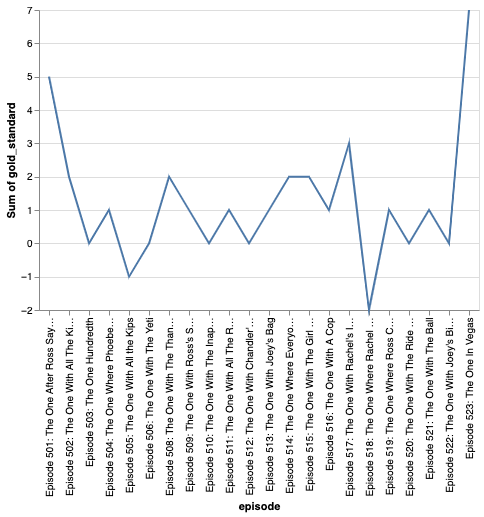

In [255]:
season5_graph

In [282]:
# season5_graph.save('season5_graph.json')

### Season 6

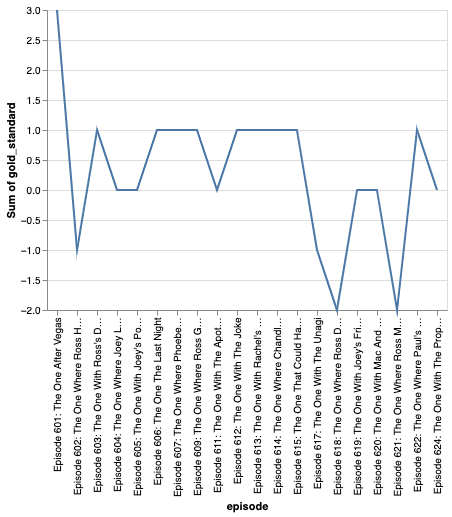

In [257]:
season6_graph

In [283]:
# season6_graph.save('season6_graph.json')

### Season 7

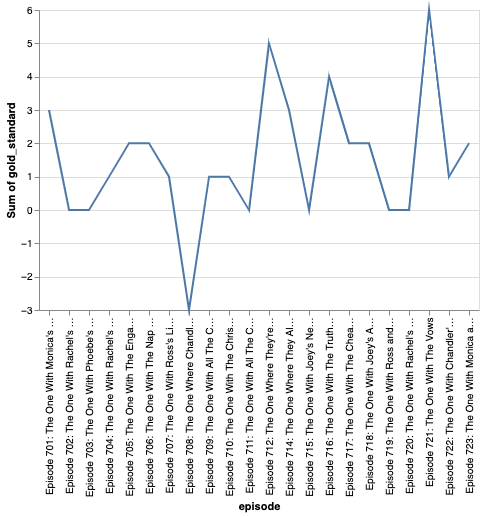

In [258]:
season7_graph

In [284]:
# season7_graph.save('season7_graph.json')

### Season 8

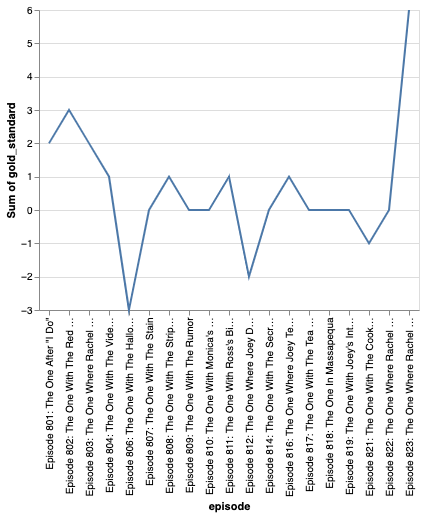

In [260]:
season8_graph

In [285]:
# season8_graph.save('season8_graph.json')

### Season 9

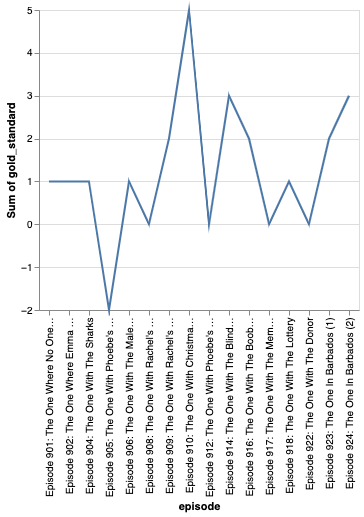

In [261]:
season9_graph

In [286]:
# season9_graph.save('season9_graph.json')

### Season 10

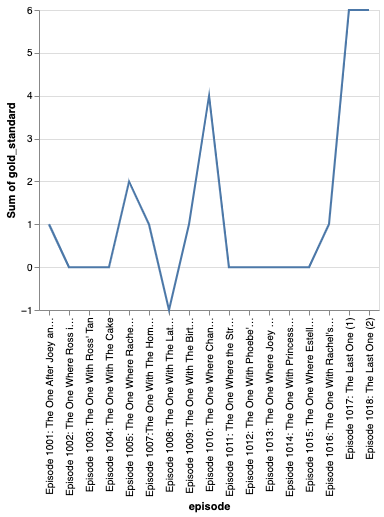

In [262]:
season10_graph

In [287]:
# season10_graph.save('season10_graph.json')